In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

<h1>Linear Damage</h1>

In [2]:
df = pd.read_csv('input\\results_complete_linear.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['elem_damaged', 'damage'], axis=1), df['elem_damaged'], test_size=0.20, random_state=41)

In [4]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [5]:
%%time
model = RandomForestClassifier(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

Wall time: 24.4 s


<h3>Components from PCA</h3>

In [6]:
pca.n_components_

20

<h3>Classification Report</h3>

In [7]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.38393   1.00000   0.55484        43
           1    1.00000   0.92308   0.96000        39
           2    1.00000   1.00000   1.00000        42
           3    1.00000   1.00000   1.00000        42
           4    1.00000   0.97619   0.98795        42
           5    1.00000   0.92683   0.96203        41
           6    1.00000   1.00000   1.00000        39
           7    1.00000   1.00000   1.00000        45
           8    1.00000   0.95833   0.97872        48
           9    1.00000   1.00000   1.00000        35
          10    0.97826   0.93750   0.95745        48
          11    1.00000   0.97436   0.98701        39
          12    1.00000   1.00000   1.00000        29
          13    0.96078   0.94231   0.95146        52
          14    1.00000   1.00000   1.00000        52
          15    1.00000   0.97143   0.98551        35
          16    1.00000   1.00000   1.00000        43
          17    1.00000   0

<h3>Feature Importance</h3>

<BarContainer object of 20 artists>

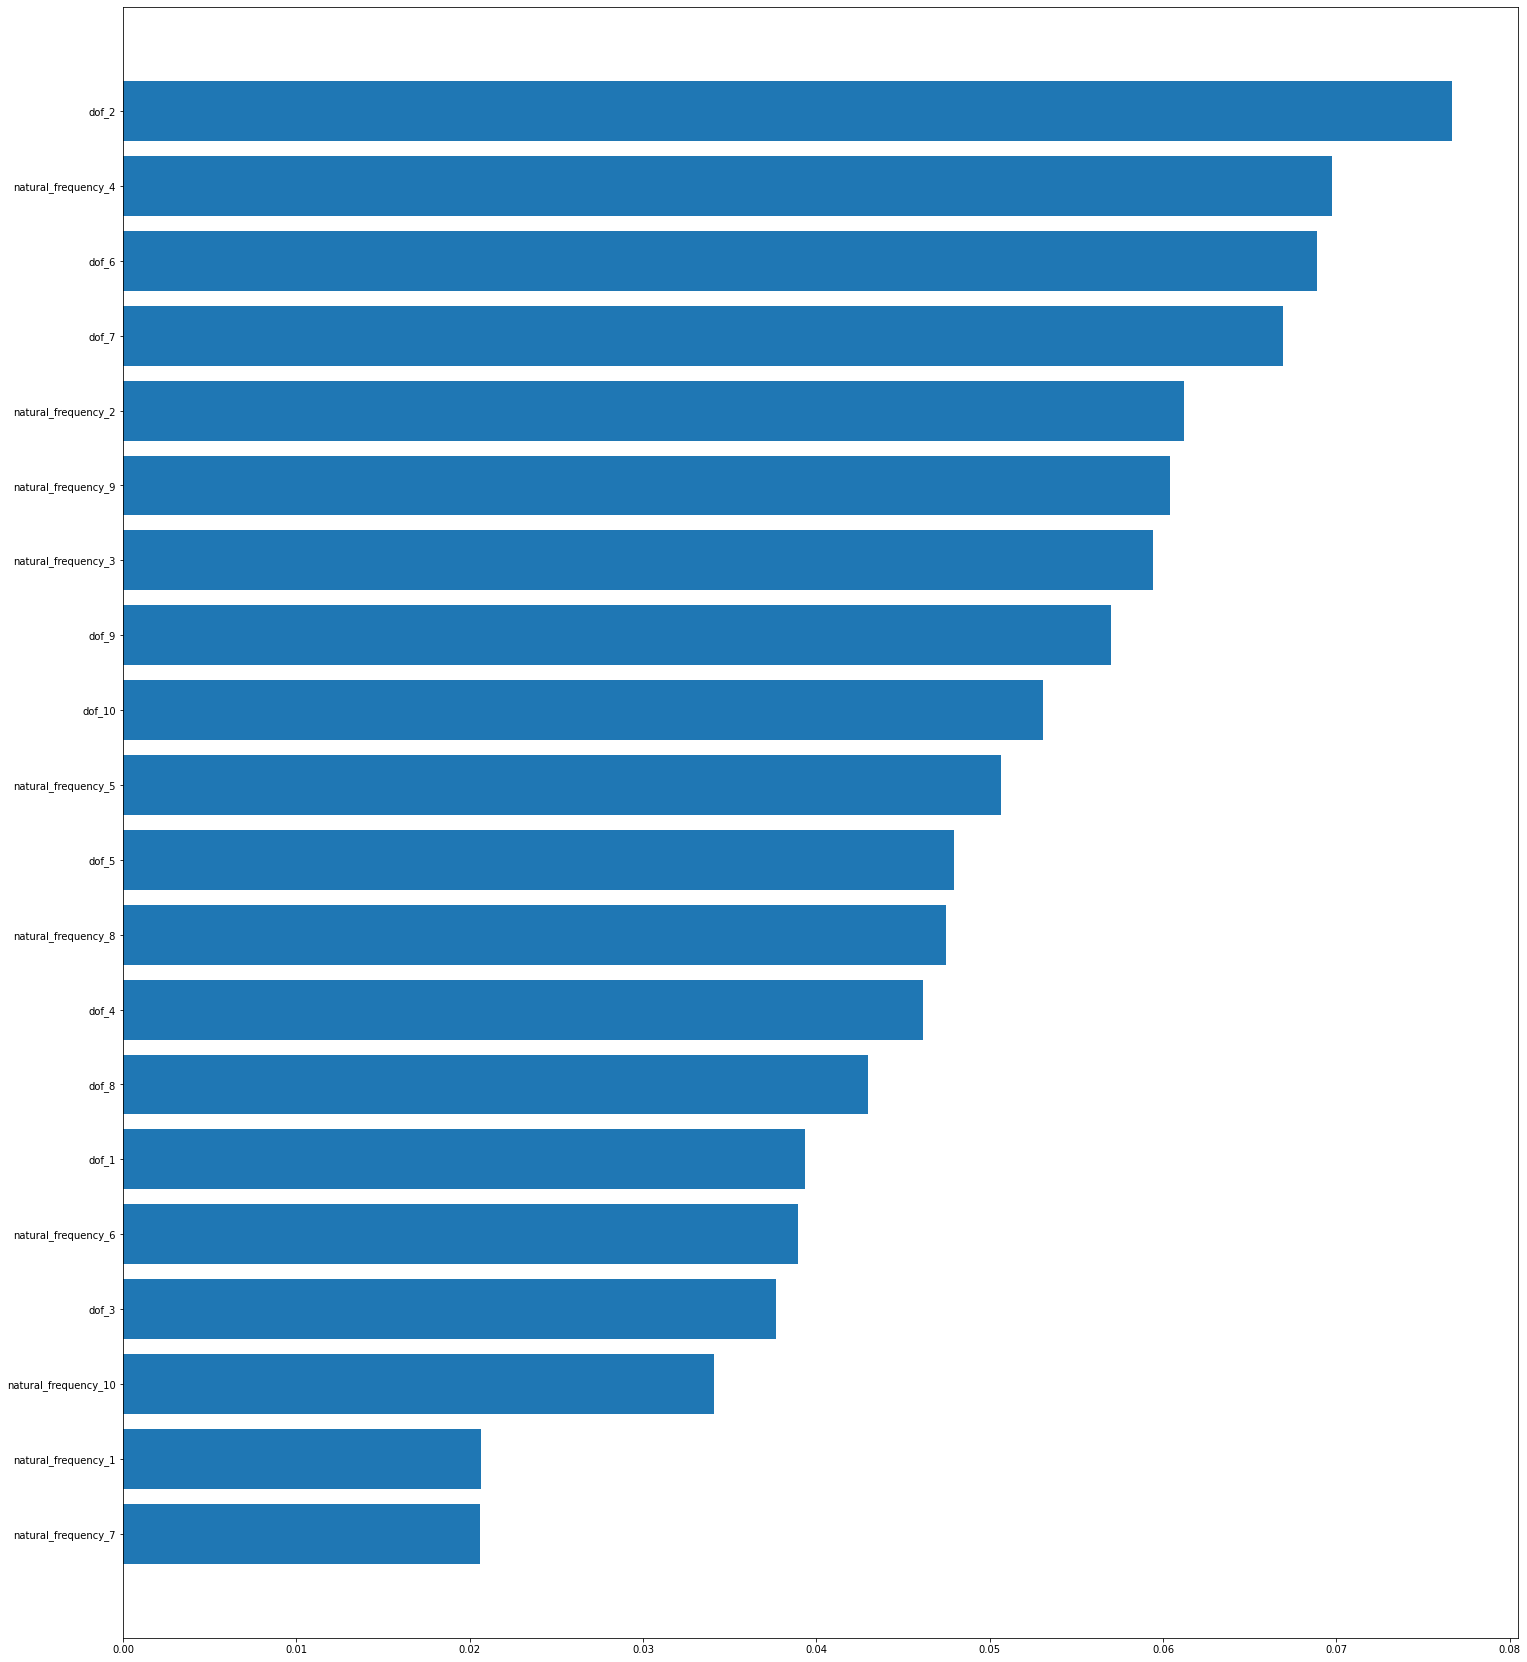

In [8]:
sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize=(25,30))
plt.barh(df.drop(['elem_damaged', 'damage'], axis=1).columns[sorted_idx], model.feature_importances_[sorted_idx])

<h1>Exponential Damage</h1>

In [9]:
df_exp = pd.read_csv('input\\results_complete_exponential.csv')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_exp.drop(['elem_damaged', 'damage'], axis=1), df_exp['elem_damaged'], test_size=0.20, random_state=41)

In [11]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
%%time
model = RandomForestClassifier(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

Wall time: 24.6 s


<h3>Components from PCA</h3>

In [13]:
pca.n_components_

19

<h3>Classification Report</h3>

In [14]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.23889   1.00000   0.38565        43
           1    0.94286   0.84615   0.89189        39
           2    1.00000   1.00000   1.00000        42
           3    1.00000   1.00000   1.00000        42
           4    1.00000   1.00000   1.00000        42
           5    1.00000   0.92683   0.96203        41
           6    1.00000   1.00000   1.00000        39
           7    1.00000   1.00000   1.00000        45
           8    1.00000   0.95833   0.97872        48
           9    1.00000   1.00000   1.00000        35
          10    1.00000   0.95833   0.97872        48
          11    1.00000   0.97436   0.98701        39
          12    1.00000   1.00000   1.00000        29
          13    0.83333   0.86538   0.84906        52
          14    1.00000   0.98077   0.99029        52
          15    1.00000   0.94286   0.97059        35
          16    0.97727   1.00000   0.98851        43
          17    1.00000   1

<h3>Feature Importance</h3>

<BarContainer object of 19 artists>

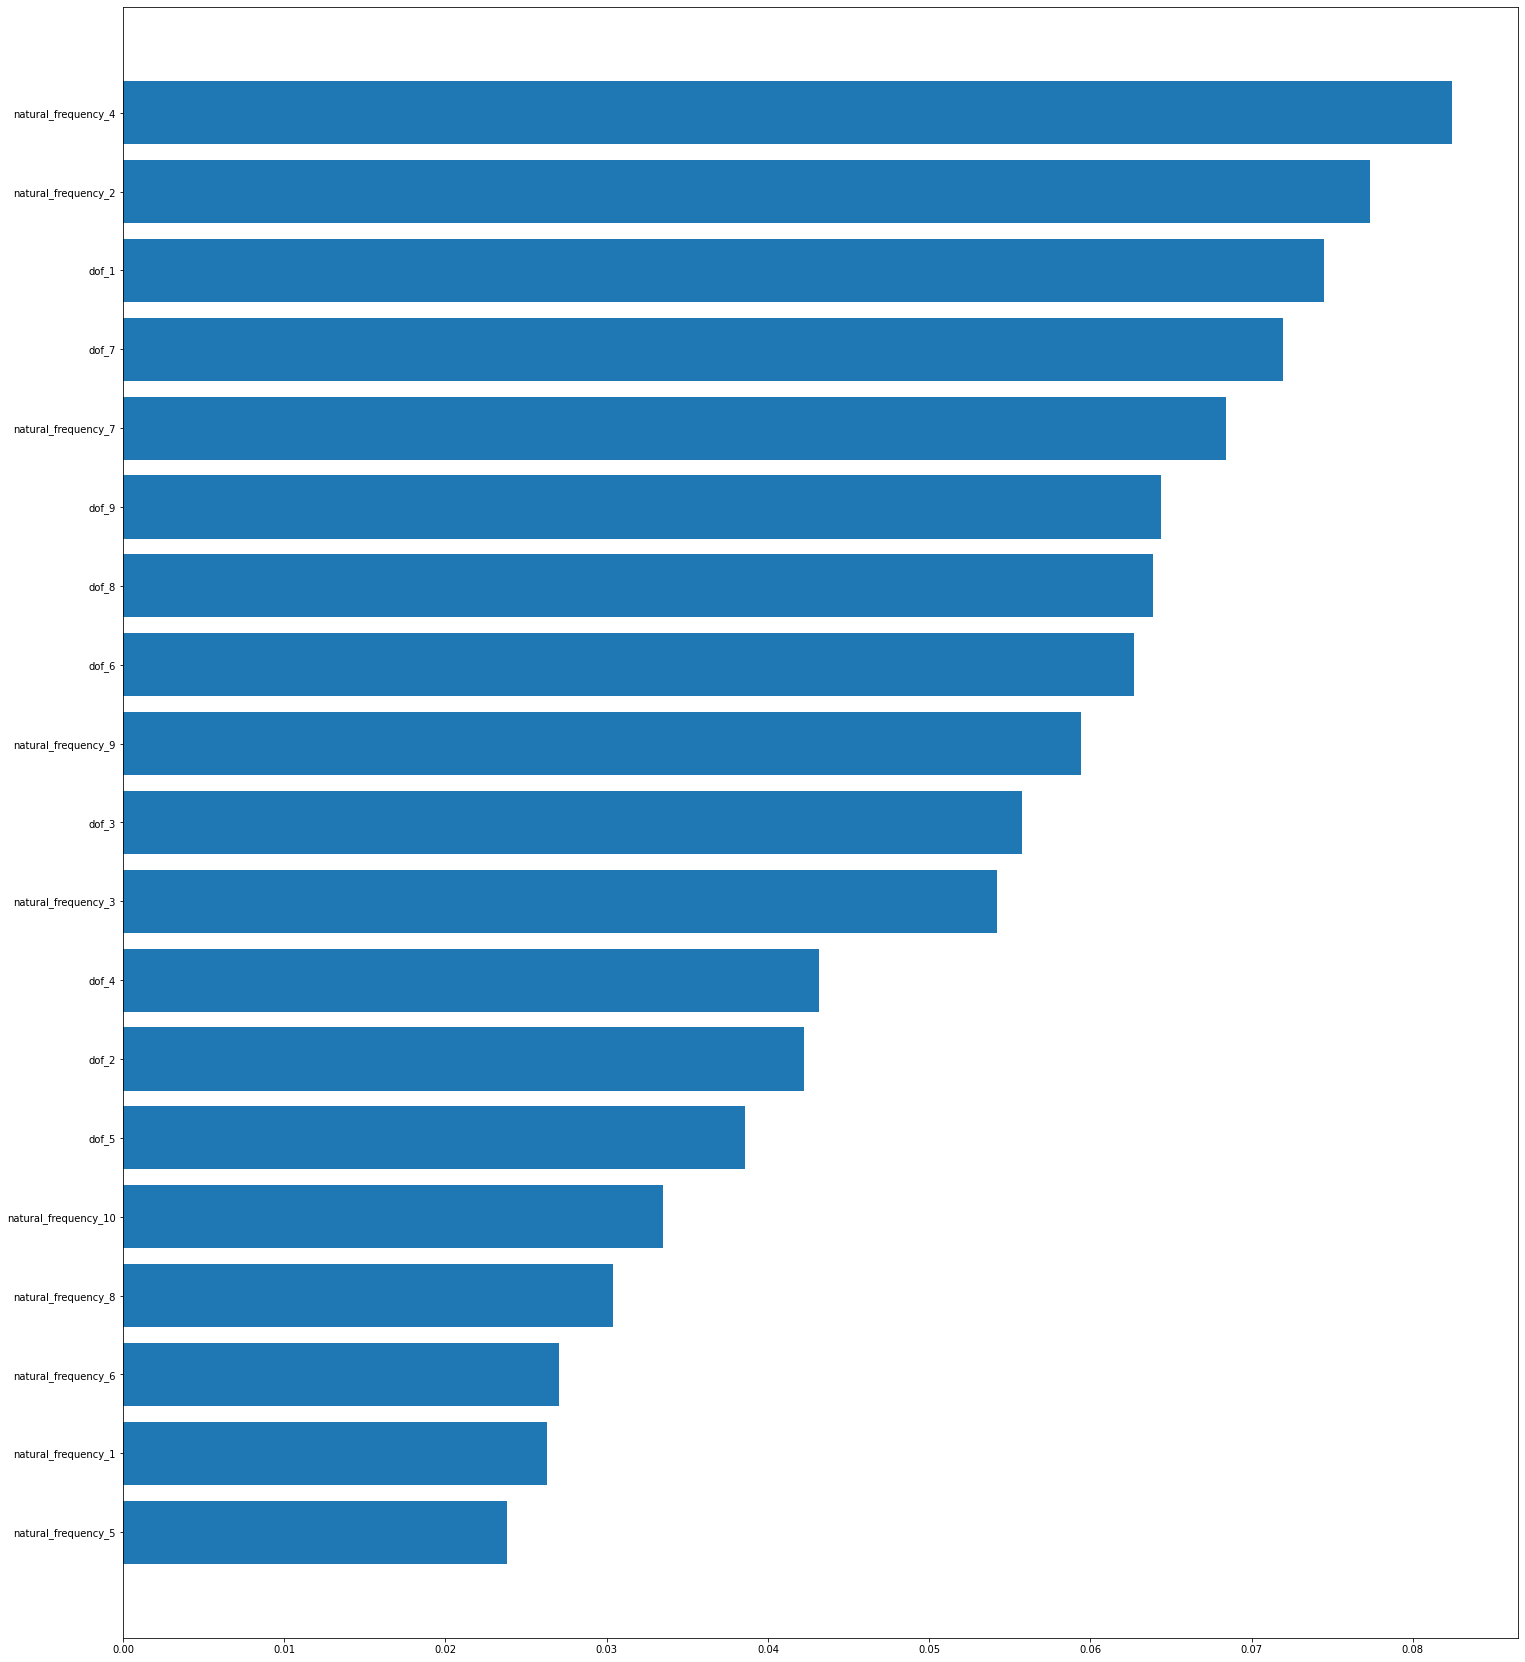

In [15]:
sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize=(25,30))
plt.barh(df_exp.drop(['elem_damaged', 'damage'], axis=1).columns[sorted_idx], model.feature_importances_[sorted_idx])

<h1>Sigmoid-like Damage</h1>

In [16]:
df_sig = pd.read_csv('input\\results_complete_sigmoid_like.csv')

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_sig.drop(['elem_damaged', 'damage'], axis=1), df_sig['elem_damaged'], test_size=0.20, random_state=41)

In [43]:
scaler = StandardScaler()
hot_encoder = OneHotEncoder(sparse=False)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = hot_encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test = hot_encoder.transform(y_test.values.reshape(-1, 1))

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [44]:
%%time
model = RandomForestClassifier(n_jobs=6, random_state=41)
model.fit(X_train, y_train)
pred = model.predict(X_test)

Wall time: 27.8 s


<h3>Components from PCA</h3>

In [45]:
pca.n_components_

14

<h3>Classification Report</h3>

In [46]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), digits=5))

              precision    recall  f1-score   support

           0    0.01749   1.00000   0.03437        43
           1    0.84615   0.28205   0.42308        39
           2    1.00000   0.97619   0.98795        42
           3    1.00000   0.97619   0.98795        42
           4    1.00000   0.69048   0.81690        42
           5    0.73529   0.60976   0.66667        41
           6    1.00000   0.41026   0.58182        39
           7    0.97561   0.88889   0.93023        45
           8    1.00000   0.93750   0.96774        48
           9    0.91667   0.31429   0.46809        35
          10    0.66667   0.33333   0.44444        48
          11    1.00000   0.43590   0.60714        39
          12    1.00000   0.24138   0.38889        29
          13    1.00000   0.17308   0.29508        52
          14    1.00000   0.32692   0.49275        52
          15    1.00000   0.65714   0.79310        35
          16    1.00000   0.41860   0.59016        43
          17    0.90909   0

C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gabriel\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<h3>Feature Importance</h3>

<BarContainer object of 14 artists>

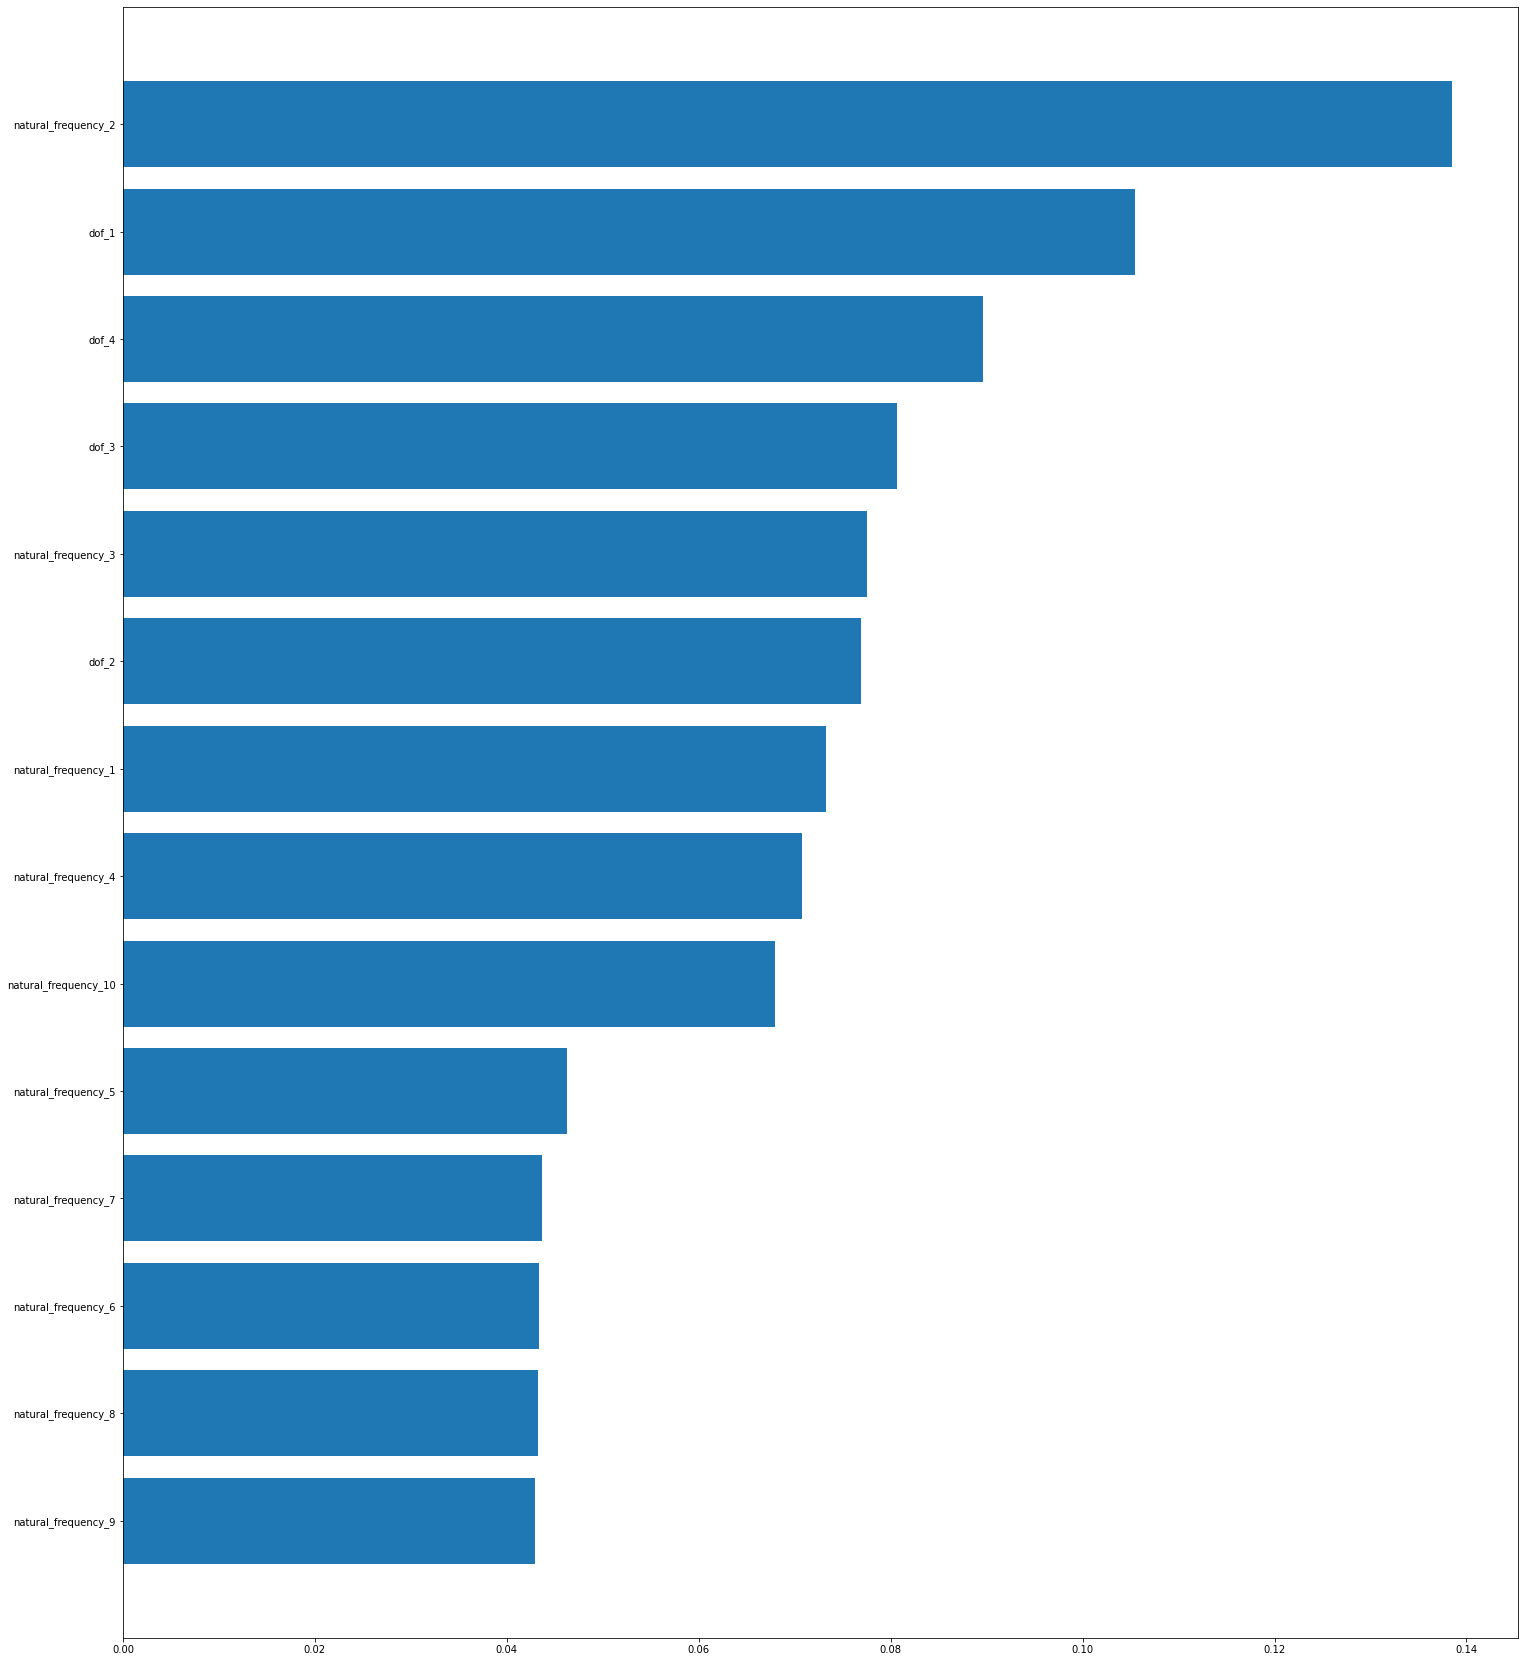

In [47]:
sorted_idx = model.feature_importances_.argsort()

plt.figure(figsize=(25,30))
plt.barh(df_sig.drop(['elem_damaged', 'damage'], axis=1).columns[sorted_idx], model.feature_importances_[sorted_idx])